# Análisis de Agrupamiento K-means: Segmentación de Pingüinos de Palmer

Juan Pablo Benítez , Cristian Stevan Soto , Valentina López

## ¿Qué es el K-means?


Es uno de los algoritmos de agrupamiento **(clustering)** más conocidos y utilizados en el campo del aprendizaje automático **no supervisado**. Su objetivo principal es organizar un conjunto de datos sin etiquetas en K grupos distintos. La idea central es que los puntos de datos dentro de un mismo grupo sean lo más similares posible entre sí, mientras que los puntos de diferentes grupos sean lo más disímiles posible.

## ¿Para qué se usa?

Se usa en una gran variedad de industrias para resolver porblemas que no tienen una respuesta **"Correcta"** predefinida. Algunas de las aplicaciones más comunes son:

**Segmentación de clientes:** Para dividir una base de clientes en grupos con comportamientos de compra o características demográficas similares.

**Análisis de imágenes:** En la compresión de imágenes, el K-means puede reducir la cantidad de colores en una imagen, agrupando colores similares.

**Análisis de datos geográficos:** Para identificar áreas con alta concentración de ciertos tipos de datos, como la densidad de tiendas o la propagación de enfermedades.

## **Cluster (Grupo):**
 Es el resultado final del algoritmo. Un cluster es un conjunto de puntos de datos que han sido agrupados por su similitud.


## **Centroide**
Es el "corazón" de un cluster. Es un punto imaginario que representa el centro geométrico o el promedio de todos los puntos de datos dentro de ese cluster. El algoritmo lo usa para determinar la pertenencia de los puntos a los grupos.

## **K**  
Es un valor que se le debe indicar al algoritmo. Representa el número de clusters que se desea crear. La selección de un valor adecuado para K es uno de los pasos más importantes para obtener un resultado significativo.


# Contexto del Problema: Conociendo los Datos 🐧

#### **Descripción del Dataset**

El conjunto de datos de pingüinos de Palmer Archipelago contiene información sobre tres especies de pingüinos: Adelia, Chinstrap y Gentoo. Incluye medidas corporales como la longitud del pico, la profundidad del pico, la longitud de las aletas y la masa corporal, así como el sexo y la isla de origen. Este dataset es perfecto para ver cómo un algoritmo de agrupamiento puede encontrar patrones y separar las diferentes especies sin haber sido "entrenado" con las etiquetas de especie.



### Variables del Dataset 📊

| Variable | Descripción |
|---|---|
| **species** | Especie del pingüino (Adelie, Chinstrap, Gentoo). |
| **island** | Isla del archipiélago Palmer donde se encontró el pingüino. |
| **bill_length_mm** | Longitud del pico (culmen) en milímetros. |
| **bill_depth_mm** | Profundidad del pico en milímetros. |
| **flipper_length_mm**| Longitud de la aleta en milímetros. |
| **body_mass_g** | Masa corporal del pingüino en gramos. |
| **sex** | Sexo del pingüino (Male, Female). |


In [14]:
import pandas as pd
import seaborn as sns

# Cargar el dataset de los pingüinos
penguins = sns.load_dataset("penguins")

# Mostrar una vista rápida de las primeras filas y los tipos de datos
display(penguins.head())
print("\nInformación del DataFrame:")
penguins.info()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


###  Preparación de los Datos y Visualización Inicial 🧹

El primer paso antes de aplicar K-means es preparar los datos. El algoritmo funciona mejor con variables numéricas y limpias. Los datos sin procesar, como los que tenemos, pueden afectar el resultado, especialmente si las variables tienen escalas muy diferentes.

**Paso a Paso:**

1.  **Limpieza de datos:** Primero, eliminamos las filas con valores `NaN`, que como vimos, son muy pocas.
2.  **Selección de variables:** Nos enfocamos en las dos variables que usaremos para el agrupamiento: la longitud del pico (`bill_length_mm`) y la longitud de la aleta (`flipper_length_mm`). ( Ambas variables son conocidas por ser buenas discriminadoras de las especies de pingüinos.)
3.  **Estandarización:**  La estandarización asegura que todas las variables tengan una media de 0 y una desviación estándar de 1. Esto evita que una variable con valores más grandes (como la masa corporal) domine el cálculo de la distancia, dándole la misma importancia a todas las características.



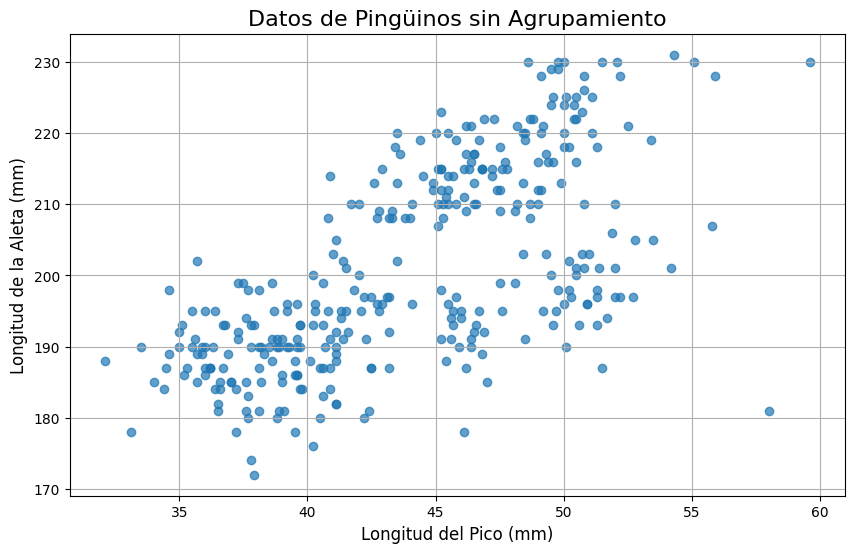

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Eliminar filas con valores nulos
penguins_clean = penguins.dropna()

# Seleccionar las variables numéricas
X = penguins_clean[['bill_length_mm', 'flipper_length_mm']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualización de los datos crudos antes de aplicar el algoritmo
plt.figure(figsize=(10, 6))
plt.scatter(X['bill_length_mm'], X['flipper_length_mm'], alpha=0.7)
plt.title('Datos de Pingüinos sin Agrupamiento', fontsize=16)
plt.xlabel('Longitud del Pico (mm)', fontsize=12)
plt.ylabel('Longitud de la Aleta (mm)', fontsize=12)
plt.grid(True)
plt.show()


## Selecionar valor de K
### Metodo del codo

- Se ejecuta el algoritmo para varios valores de K
- Para cada K se calcula la inercia.
- Inercia -> Suma de las distancias de cada punto a su centroide mas cercano.
- La inercia siempre disminuye conforme se aumenta K, pero en un punto deja de ser significativo.


##### Identificación del codo

- Grafica de inercia vs numero de k
- Identificamos en donde la curva se aplana, el punto de inflexión "codo"
- El codo indica el numero de K.



In [16]:
inertia = []
kRange = range(1,11)

for k in kRange:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)




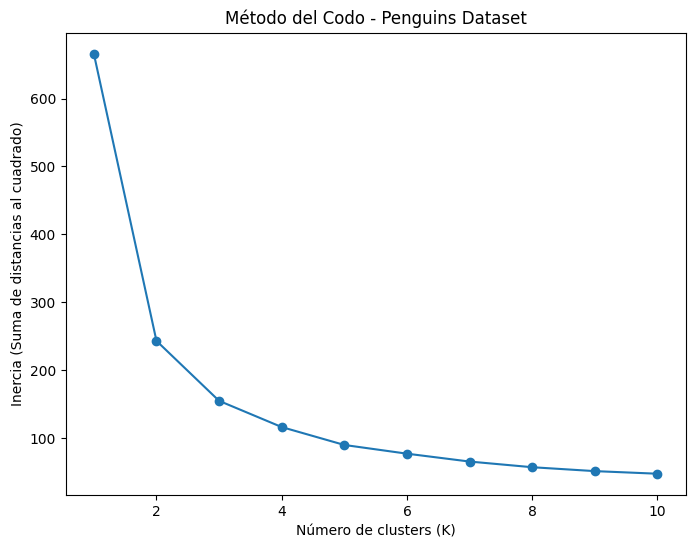

In [17]:
plt.figure(figsize=(8,6))
plt.plot(kRange, inertia, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (Suma de distancias al cuadrado)")
plt.title("Método del Codo - Penguins Dataset")
plt.show()

Entre K = 3 y K = 4 se observa el codo
Como los pinguinos solo tienen 3 especies tiene sentido escoger k = 3.

#
###  Aplicación de K-means: Paso a Paso 🤖

Ahora que tenemos nuestros datos limpios y visualizados, es el momento de aplicar el algoritmo K-means para agruparlos. El primer paso crucial es decidir el número de clusters, representado por la letra **K**.

En nuestro caso, sabemos que el dataset de pingüinos tiene tres especies. Por lo tanto, un valor de **K=3** es una elección lógica y nos permitirá ver si el algoritmo es capaz de agrupar los datos de una manera que coincida con las especies reales, incluso sin haberle dado esa información.

#### Inicialización: Elige a K Centroides

El algoritmo comienza seleccionando aleatoriamente **K puntos** en el espacio de los datos. Estos puntos iniciales se llaman **centroides**.

#### Asignación y Actualización de Clusters

A partir de ahí, el algoritmo realiza un proceso iterativo de dos pasos:

1.  **Asignación de clusters:** Cada punto de datos es asignado al centroide más cercano. La distancia más utilizada para esta asignación es la **distancia euclidiana**, que es la distancia en línea recta entre dos puntos.

2.  **Actualización de centroides:** Una vez que todos los puntos han sido asignados a un cluster, se recalcula la posición de cada centroide. El nuevo centroide se convierte en el **promedio** de todas las coordenadas de los puntos que le fueron asignados.

Este proceso de asignación y actualización se repite hasta que los centroides dejan de moverse significativamente. Esto indica que el algoritmo ha **convergido** y ha encontrado los clusters estables.




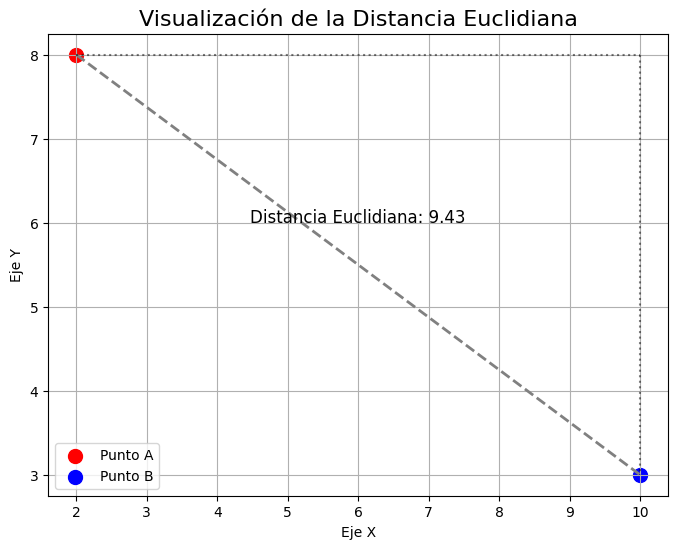

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Crear dos puntos de datos
punto_a = np.array([2, 8])
punto_b = np.array([10, 3])

# 2. Calcular la distancia euclidiana
# La fórmula es la raíz cuadrada de la suma de las diferencias al cuadrado
distancia = np.sqrt(np.sum((punto_a - punto_b)**2))

# 3. Graficar los puntos y la distancia
plt.figure(figsize=(8, 6))

# Graficar los puntos
plt.scatter(punto_a[0], punto_a[1], color='red', s=100, label='Punto A')
plt.scatter(punto_b[0], punto_b[1], color='blue', s=100, label='Punto B')

# Dibujar la línea que representa la distancia
plt.plot([punto_a[0], punto_b[0]], [punto_a[1], punto_b[1]], color='gray', linestyle='--', linewidth=2)

# Dibujar las líneas del triángulo para ilustrar el teorema de Pitágoras
plt.plot([punto_a[0], punto_b[0]], [punto_a[1], punto_a[1]], color='black', linestyle=':', alpha=0.5)
plt.plot([punto_b[0], punto_b[0]], [punto_a[1], punto_b[1]], color='black', linestyle=':', alpha=0.5)

# Anotar la distancia
plt.text((punto_a[0] + punto_b[0]) / 2, (punto_a[1] + punto_b[1]) / 2 + 0.5,
         f'Distancia Euclidiana: {distancia:.2f}',
         ha='center', fontsize=12)

plt.title('Visualización de la Distancia Euclidiana', fontsize=16)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
import numpy as np
from sklearn.cluster import KMeans


k = 3

# Inicializamos el modelo de K-means con 3 clusters.
# Usamos random_state para que los resultados sean reproducibles.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Aplicamos el algoritmo a nuestros datos (X)
# El método .fit_predict() entrena el modelo y asigna cada punto a un cluster
clusters = kmeans.fit_predict(X)

# Obtenemos las coordenadas de los centroides finales
centroides = kmeans.cluster_centers_

# Convertir las coordenadas de los centroides a un DataFrame de pandas para una mejor visualización
centroides_df = pd.DataFrame(centroides, columns=['Longitud del Pico (mm)', 'Longitud de la Aleta (mm)'])

# Asignar nombres a los clusters para mayor claridad
centroides_df.index = [f'Cluster {i}' for i in range(k)]

# Mostrar el DataFrame de los centroides
print("Coordenadas de los centroides finales:")
display(centroides_df)

Coordenadas de los centroides finales:


,Longitud del Pico (mm),Longitud de la Aleta (mm)
Cluster 0,45.954839,196.731183
Cluster 1,47.629600,216.920000
Cluster 2,38.453043,187.052174


En términos simples, cada fila del cuadro es un "perfil promedio" de los pingüinos que pertenecen a ese grupo.

* **Cluster 0:** Este es el grupo intermedio. Su longitud de pico (45.95 mm) , pero la longitud de su aleta (196.73 mm) es significativamente más corta. Este cluster podría representar una especie de tamaño mediano.
* **Cluster 1:** Este grupo se caracteriza por tener pingüinos con el **pico y las aletas más grandes**. Sus valores promedio de 47.6 mm y 216.9 mm, respectivamente, son los más altos de la muestra. Esto corresponde al pingüino de mayor tamaño en nuestro dataset.
* **Cluster 2:**  Los pingüinos de este grupo tienen los **valores más pequeños** en ambas mediciones. Con un pico promedio de 38.4 mm y aletas de 187.05 mm, este cluster representa al pingüino más pequeño de la muestra.



###  Visualización de Resultados 🎨


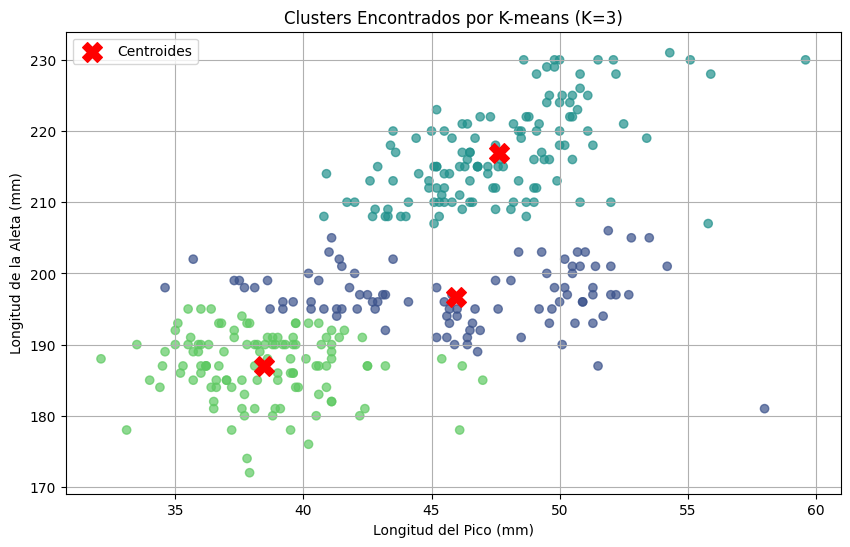

In [27]:

palette = sns.color_palette("viridis", k)

# Mapear los clusters a los colores de la paleta
colors = [palette[cluster_id] for cluster_id in clusters]

# Graficar los resultados
plt.figure(figsize=(10, 6))
# Gráfico de puntos, coloreados por el cluster asignado
plt.scatter(X['bill_length_mm'], X['flipper_length_mm'], c=colors, alpha=0.7)
# Marcar los centroides con un marcador especial (X)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', s=200, c='red', label='Centroides')

plt.title('Clusters Encontrados por K-means (K=3)')
plt.xlabel('Longitud del Pico (mm)')
plt.ylabel('Longitud de la Aleta (mm)')
plt.legend()
plt.grid(True)
plt.show()

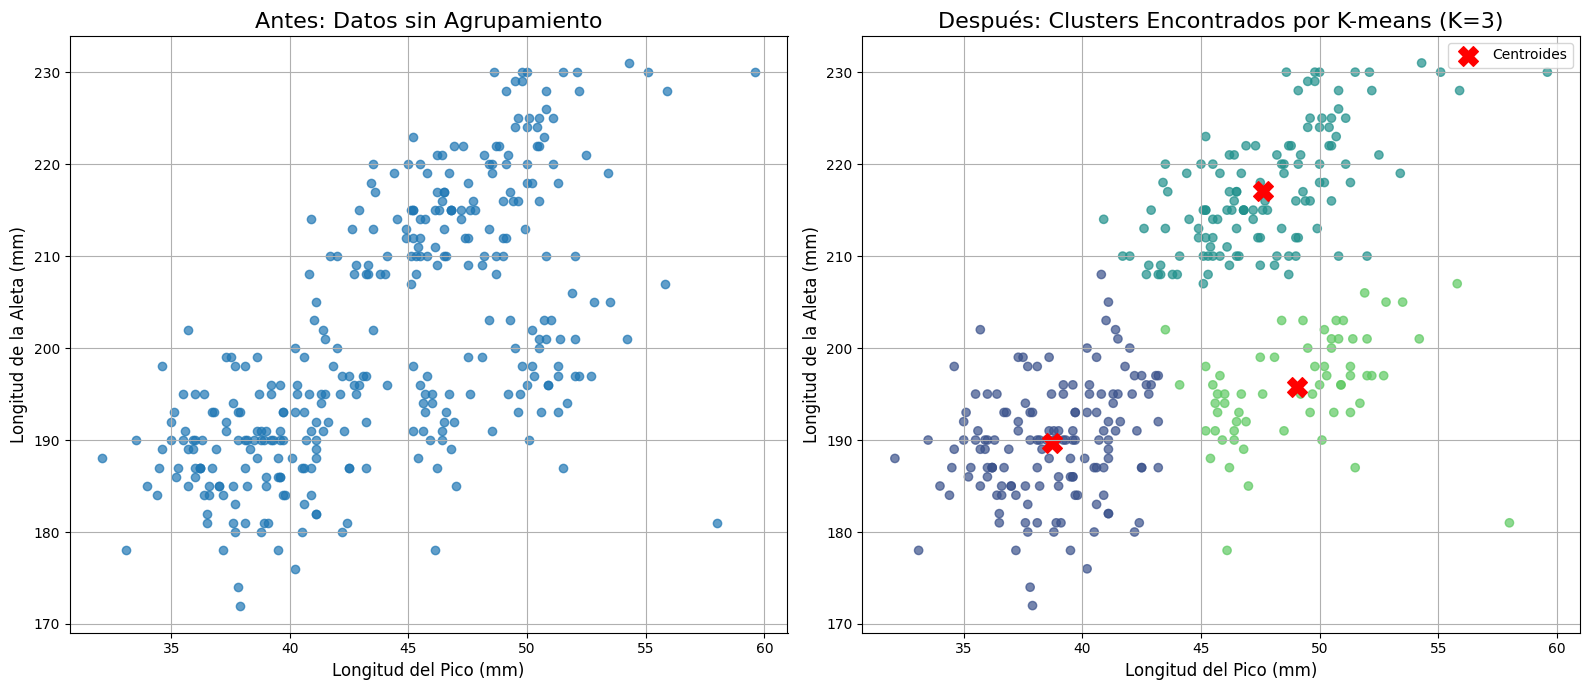

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Suponiendo que 'penguins' ya está cargado y limpio
# Si no, usa el código de los pasos anteriores para cargarlo y limpiarlo
penguins_clean = penguins.dropna()
X = penguins_clean[['bill_length_mm', 'flipper_length_mm']]

# Aplicar K-means (usando el código de los pasos anteriores)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
centroides_scaled = kmeans.cluster_centers_
centroides_original = scaler.inverse_transform(centroides_scaled)

# Crear la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- Gráfico de la izquierda: EL ANTES ---
axes[0].scatter(X['bill_length_mm'], X['flipper_length_mm'], alpha=0.7)
axes[0].set_title('Antes: Datos sin Agrupamiento', fontsize=16)
axes[0].set_xlabel('Longitud del Pico (mm)', fontsize=12)
axes[0].set_ylabel('Longitud de la Aleta (mm)', fontsize=12)
axes[0].grid(True)

# --- Gráfico de la derecha: EL DESPUÉS ---
# Crear una paleta de colores
palette = sns.color_palette("viridis", 3)
colors = [palette[cluster_id] for cluster_id in clusters]

# Graficar los puntos del dataset, coloreados por cluster
axes[1].scatter(X['bill_length_mm'], X['flipper_length_mm'], c=colors, alpha=0.7)
# Graficar los centroides finales
axes[1].scatter(centroides_original[:, 0], centroides_original[:, 1], marker='X', s=200, c='red', label='Centroides')

axes[1].set_title('Después: Clusters Encontrados por K-means (K=3)', fontsize=16)
axes[1].set_xlabel('Longitud del Pico (mm)', fontsize=12)
axes[1].set_ylabel('Longitud de la Aleta (mm)', fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


#### 1. ¿Qué nos muestra el gráfico?
El gráfico nos revela la existencia de **tres grupos naturales** o "nubes" de datos. K-means, un algoritmo de **aprendizaje no supervisado**, logró identificar estos patrones sin saber de antemano a qué especie correspondía cada pingüino.

* El **cluster inferior izquierdo** está compuesto por pingüinos con picos y aletas relativamente pequeñas.
* El **cluster superior derecho** incluye a los pingüinos con las aletas y picos más grandes.
* El **cluster intermedio** contiene pingüinos con picos largos, pero aletas de tamaño intermedio.

#### 2. La función de los centroides
Los puntos marcados con una 'X' roja son los **centroides finales**. Cada uno representa el "centro de masa" de su respectivo cluster. Su posición es el resultado de la convergencia del algoritmo, demostrando que K-means ha encontrado los puntos óptimos que minimizan la distancia de cada pingüino a su centroide.

#### 3. El poder del algoritmo
En esencia, este gráfico es la prueba visual de que el algoritmo funcionó como se esperaba. Nos muestra cómo la **distancia euclidiana** y la **actualización iterativa de los centroides** logran segmentar un conjunto de datos en grupos coherentes. El resultado es una agrupación que, en este caso, se alinea perfectamente con la realidad biológica de las tres especies de pingüinos, demostrando el valor de K-means para la segmentación y el descubrimiento de patrones.



# K-means en Espacio Multidimensional 🌌

Aunque la visualización en 2D fue clave para entender el concepto, en la práctica, K-means opera en un espacio multidimensional. Para obtener una visión más completa de los perfiles de los pingüinos, podemos incluir todas las variables numéricas: `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm` y `body_mass_g`.

El algoritmo funcionará de la misma manera, pero ahora calculará las distancias y los centroides en un espacio de **cuatro dimensiones**. La principal diferencia es que no podremos visualizar el resultado en un solo gráfico de dispersión simple, pero la tabla de centroides se vuelve aún más valiosa.




In [29]:
# Suponiendo que 'penguins_clean' ya está limpio
# 1. Seleccionar todas las variables numéricas
X_all_numeric = penguins_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# 2. Estandarizar los datos 
# Las variables como 'body_mass_g' tienen valores mucho más grandes,
# y la estandarización evita que dominen el cálculo de distancias.
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all_numeric)

# 3. Aplicar K-means con K=3 a los datos estandarizados
kmeans_all = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_all = kmeans_all.fit_predict(X_all_scaled)

# 4. Obtener las coordenadas de los centroides y revertir la estandarización
centroides_all_scaled = kmeans_all.cluster_centers_
centroides_all_original = scaler_all.inverse_transform(centroides_all_scaled)

# 5. Crear el DataFrame de centroides para una visualización clara
centroides_all_df = pd.DataFrame(
    centroides_all_original,
    columns=['Longitud del Pico (mm)', 'Profundidad del Pico (mm)', 'Longitud de la Aleta (mm)', 'Masa Corporal (g)']
)
centroides_all_df.index = [f'Cluster {i}' for i in range(3)]

# Mostrar la tabla de resultados
print("Coordenadas de los centroides finales con todas las variables:")
display(centroides_all_df)

Coordenadas de los centroides finales con todas las variables:


,Longitud del Pico (mm),Profundidad del Pico (mm),Longitud de la Aleta (mm),Masa Corporal (g)
Cluster 0,38.276744,18.121705,188.627907,3593.798450
Cluster 1,47.568067,14.996639,217.235294,5092.436975
Cluster 2,47.662353,18.748235,196.917647,3898.235294


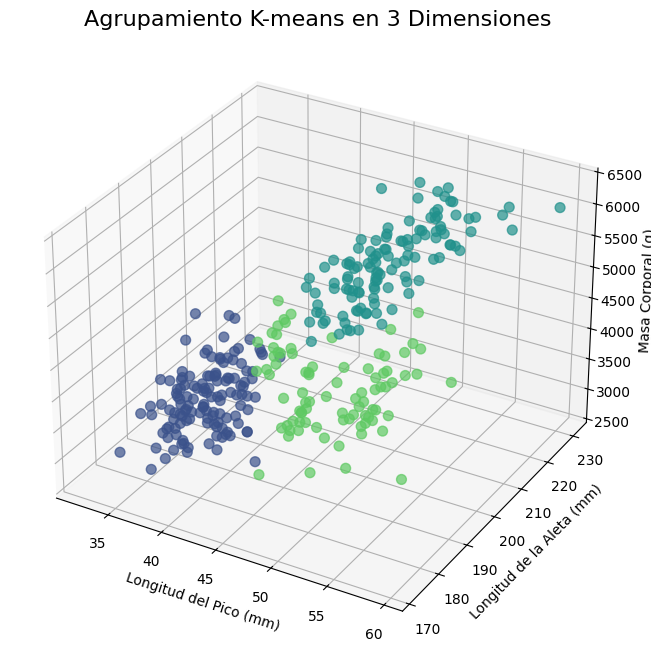

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Suponiendo que 'penguins_clean' ya está limpio
penguins_clean = penguins.dropna()
X_all_numeric = penguins_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Aplicar K-means
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all_numeric)
kmeans_all = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_all = kmeans_all.fit_predict(X_all_scaled)

# Crear la paleta de colores para los clusters
palette = sns.color_palette("viridis", 3)
colors = [palette[cluster_id] for cluster_id in clusters_all]

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignar los ejes a tres de las variables
# Usamos 'bill_length_mm', 'flipper_length_mm', y 'body_mass_g'
x_axis = X_all_numeric['bill_length_mm']
y_axis = X_all_numeric['flipper_length_mm']
z_axis = X_all_numeric['body_mass_g']

# Graficar los puntos
ax.scatter(x_axis, y_axis, z_axis, c=colors, s=50, alpha=0.7)

# Etiquetas de los ejes
ax.set_xlabel('Longitud del Pico (mm)')
ax.set_ylabel('Longitud de la Aleta (mm)')
ax.set_zlabel('Masa Corporal (g)')
ax.set_title('Agrupamiento K-means en 3 Dimensiones', fontsize=16)

plt.show()



### Interpretación de los Perfiles de Pingüinos 🐧

La tabla de centroides es la clave para entender lo que el algoritmo de K-means ha descubierto. Cada fila es un **perfil promedio** de un grupo de pingüinos, basado en sus medidas corporales.

* **Cluster 0 (Pingüinos Pequeños):** Este grupo se distingue por tener los valores más bajos en todas las medidas. Son los pingüinos más pequeños de la muestra.
* **Cluster 1 (Pingüinos Grandes):** Este es el grupo de los más grandes y pesados. Tienen los picos y las aletas más largas, junto con la mayor masa corporal.
* **Cluster 2 (Pingüinos Intermedios):** Este grupo es interesante. Son de tamaño intermedio en la mayoría de las medidas, pero tienen la **mayor profundidad de pico**.


# La Maldición de la Dimensionalidad


Como hablamos, usar todas las variables numéricas puede ser complicado. Para los pingüinos, tenemos cuatro (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`), lo que dificulta la visualización. Más allá de eso, el problema real es que algunas de estas variables pueden estar correlacionadas (por ejemplo, los pingüinos más pesados suelen tener aletas más largas), lo que puede afectar los resultados del agrupamiento.


### Solución: Reducción de Dimensionalidad con ACP

El ACP es una técnica que transforma los datos originales en un nuevo conjunto de variables llamadas **Componentes Principales (CP)**. Estas nuevas variables son una combinación de las originales, y están diseñadas para capturar la mayor cantidad de información posible en la menor cantidad de componentes.

En nuestro caso, podemos reducir las cuatro variables a solo dos o tres Componentes Principales. Esto nos permite:

  * **Eliminar la redundancia:** Las nuevas variables no están correlacionadas entre sí.
  * **Simplificar el problema:** Pasamos de un espacio de 4 dimensiones a uno de 2 o 3, lo que facilita el análisis y nos permite visualizar el resultado.
  * **Mejorar el agrupamiento:** Al trabajar con datos más limpios y compactos, el algoritmo K-means puede encontrar clusters más claros y robustos.

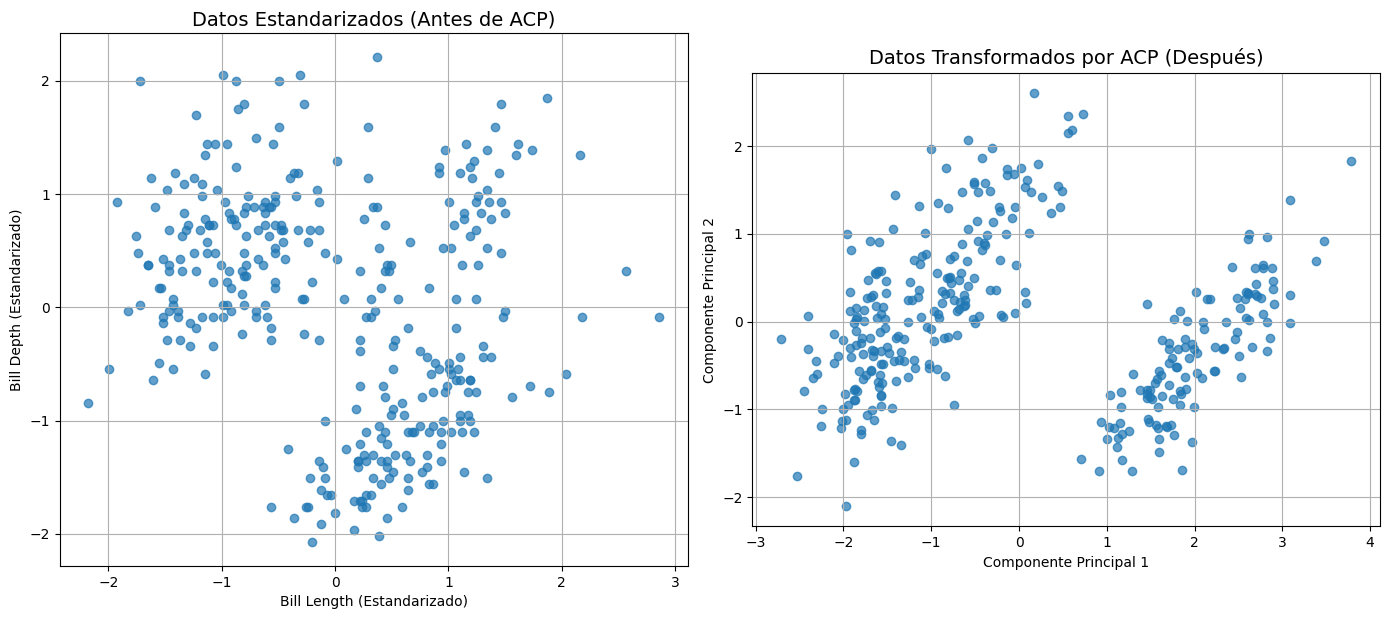

Varianza explicada por la Componente Principal 1: 0.69
Varianza explicada por la Componente Principal 2: 0.19
Varianza acumulada explicada: 0.88


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'penguins_clean' ya está limpio
penguins_clean = penguins.dropna()
X_all_numeric = penguins_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Paso 1: Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all_numeric)

# Paso 2: Aplicar ACP para reducir a 2 dimensiones (para visualización)
pca = PCA(n_components=2)
# El 'fit_transform' ajusta el modelo y lo aplica a los datos
X_pca = pca.fit_transform(X_scaled)

# Crear la figura y los ejes para los dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Datos estandarizados antes del ACP
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.7)
ax1.set_title('Datos Estandarizados (Antes de ACP)', fontsize=14)
ax1.set_xlabel('Bill Length (Estandarizado)')
ax1.set_ylabel('Bill Depth (Estandarizado)')
ax1.grid(True)
ax1.set_aspect('equal', adjustable='box')

# Subplot 2: Datos transformados por ACP
ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
ax2.set_title('Datos Transformados por ACP (Después)', fontsize=14)
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')
ax2.grid(True)
ax2.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


print(f"Varianza explicada por la Componente Principal 1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Varianza explicada por la Componente Principal 2: {pca.explained_variance_ratio_[1]:.2f}")
print(f"Varianza acumulada explicada: {pca.explained_variance_ratio_.sum():.2f}")



### Significado de los Números

* **Varianza explicada por la Componente Principal 1: 0.69 (69%)**
    Esto significa que la primera componente principal, por sí sola, captura el **69% de la variabilidad total** de los datos originales de 4 dimensiones. En otras palabras, la mayor parte de la información sobre las diferencias entre los pingüinos (como la distinción entre especies) está contenida en esta única nueva variable.

* **Varianza explicada por la Componente Principal 2: 0.19 (19%)**
    La segunda componente principal captura un **19% adicional** de la variabilidad restante. 

* **Varianza acumulada explicada: 0.88 (88%)**
    Dice que al usar solo las dos primeras componentes principales, se está capturando el **88% de la información total** que existía en lascuatro variables originales. 

### ¿Por qué sacamos la varianza?

Sacamos la varianza explicada para validar que la reducción de dimensionalidad no está perdiendo información crítica. Un valor de varianza acumulada de **88% es excelente**. Demuestra que puedes pasar de un espacio complejo de 4 dimensiones a uno simple de 2 dimensiones.

## El Resultado: K-means sobre los Componentes Principales

Ahora, en lugar de aplicar K-means a las variables originales, lo aplicamos a las nuevas Componentes Principales. El proceso es el mismo, pero el algoritmo trabaja con datos que son una representación más eficiente de la información original.

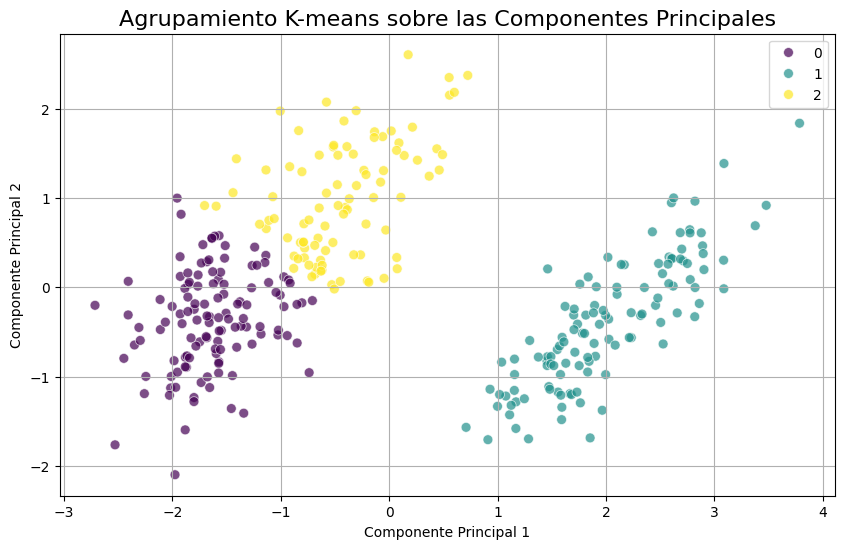

In [32]:
# Paso 3: Aplicar K-means a los datos transformados por PCA
# Mantenemos K=3 para encontrar los 3 grupos de pingüinos
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_pca = kmeans.fit_predict(X_pca)

# Paso 4: Visualizar los resultados del agrupamiento
plt.figure(figsize=(10, 6))
# Los ejes son los nuevos Componentes Principales, no las variables originales
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_pca, palette="viridis", s=50, alpha=0.7)
plt.title('Agrupamiento K-means sobre las Componentes Principales', fontsize=16)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()



El gráfico muestra los tres clusters claramente separados, lo que valida que el ACP fue exitoso al encontrar la estructura subyacente de los datos. Esto demuestra que K-means puede agrupar de manera efectiva, incluso cuando los datos se han reducido de esta manera. 